# **Installing Required Libraries**

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Importing the libraries**

In [4]:
import pandas as pd
import numpy as np

# **Load the Excel Dataset**

In [5]:
rproducts = pd.read_excel("OnlineRetail (1).xlsx",engine='openpyxl')

In [6]:
rproducts.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Clean and Process the Data**

In [7]:
rproducts.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#dropping rows which have null values for description and customerID
rproducts.dropna(subset = ['CustomerID', 'Description'], inplace =True)

In [9]:
#checking for the dataset now
rproducts.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
#now filtering out cancelled orders
rproducts = rproducts[rproducts['Quantity']>0]

In [11]:
#calculating total price for each product
rproducts['TotalPrice'] = rproducts['Quantity'] * rproducts['UnitPrice']

In [12]:
rproducts.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
#extracting month for monthly analysis
rproducts['Month'] = rproducts['InvoiceDate'].dt.month

In [14]:
rproducts.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


# **Displaying the most sold items globally** 

In [15]:
globalproducts = rproducts.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [16]:
globalproducts.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

In [17]:
countryproducts = (
    rproducts.groupby([ "Country", "Description"], as_index=False)[ "Quantity" ]
    .sum()
    .reset_index() #so country and description could be columns again
    .pipe(
        lambda y: y.groupby('Country', group_keys=False)
        .apply( lambda x: x.nlargest(5, "Quantity"))) #top 5 quantities of diff countries
        .reset_index(drop=True)
)

C:\Users\Shailesh\AppData\Local\Temp\ipykernel_12276\353531418.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply( lambda x: x.nlargest(5, "Quantity"))) #top 5 quantities of diff countries


In [18]:
for country, group in countryproducts.groupby("Country"):
    print(f"\nTop 5 producs bought for {country}")
    print(group[["Description", "Quantity"]])


Top 5 producs bought for Australia
                     Description  Quantity
0         MINI PAINT SET VINTAGE      2952
1             RABBIT NIGHT LIGHT      1884
2          RED  HARMONICA IN BOX      1704
3  RED TOADSTOOL LED NIGHT LIGHT      1344
4   HOMEMADE JAM SCENTED CANDLES      1080

Top 5 producs bought for Austria
                           Description  Quantity
5     SET 12 KIDS COLOUR  CHALK STICKS       288
6                   MINI JIGSAW PURDEY       240
7       PACK OF 6 PANNETONE GIFT BOXES       144
8         PACK OF 6 SWEETIE GIFT BOXES       144
9  12 PENCILS SMALL TUBE RED RETROSPOT        48

Top 5 producs bought for Bahrain
                           Description  Quantity
10          ICE CREAM SUNDAE LIP GLOSS        96
11                  DOUGHNUT LIP GLOSS        60
12  GROW A FLYTRAP OR SUNFLOWER IN TIN        24
13     S/4 PINK FLOWER CANDLES IN BOWL        12
14  MINI CAKE STAND WITH HANGING CAKES         8

Top 5 producs bought for Belgium
                

In [19]:
monthlyproducts = (
    rproducts
    .assign(Month=rproducts["InvoiceDate"].dt.to_period("M")) #adds month column in this way: YYYY-MM
    .groupby([ "Month", "Description"], as_index=False)[ "Quantity" ]
    .sum()
    .reset_index() #so month and description could be columns again
    .pipe(
        lambda y: y.groupby('Month', group_keys=False)
        .apply( lambda x: x.nlargest(5, "Quantity"))) #top 5 quantities for diff months
        .reset_index(drop=True)
)

C:\Users\Shailesh\AppData\Local\Temp\ipykernel_12276\3891816432.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply( lambda x: x.nlargest(5, "Quantity"))) #top 5 quantities for diff months


In [20]:
for month, group in monthlyproducts.groupby("Month"):
    print(f"\nTop 5 producs bought for {month}")
    print(group[["Description", "Quantity"]])


Top 5 producs bought for 2010-12
                          Description  Quantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS      5139
1  WHITE HANGING HEART T-LIGHT HOLDER      3611
2     PACK OF 72 RETROSPOT CAKE CASES      3572
3         HAND WARMER BABUSHKA DESIGN      3367
4              MINI PAINT SET VINTAGE      2700

Top 5 producs bought for 2011-01
                          Description  Quantity
5      MEDIUM CERAMIC TOP STORAGE JAR     74215
6  WHITE HANGING HEART T-LIGHT HOLDER      5467
7     PACK OF 72 RETROSPOT CAKE CASES      3329
8  FAIRY CAKE FLANNEL ASSORTED COLOUR      3240
9                  BROCADE RING PURSE      3174

Top 5 producs bought for 2011-02
                           Description  Quantity
10               EMPIRE DESIGN ROSETTE      3986
11  GROW A FLYTRAP OR SUNFLOWER IN TIN      3795
12   WORLD WAR 2 GLIDERS ASSTD DESIGNS      3457
13             JUMBO BAG RED RETROSPOT      2971
14           PACK OF 12 LONDON TISSUES      2659

Top 5 producs bought for 20

# **Calculating User Similarity using Cosine Similarity**

In [21]:
user_item_matrix = rproducts.pivot_table(index="CustomerID", columns="StockCode", values="Quantity", aggfunc='sum', fill_value=0)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix) #computes similarity between users buying the same products

In [23]:
user_similarity 

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.14887891, ..., 0.01087319, 0.07451023,
        0.10894226],
       [0.        , 0.14887891, 1.        , ..., 0.        , 0.17517012,
        0.11009593],
       ...,
       [0.        , 0.01087319, 0.        , ..., 1.        , 0.00344423,
        0.        ],
       [0.        , 0.07451023, 0.17517012, ..., 0.00344423, 1.        ,
        0.04444524],
       [0.        , 0.10894226, 0.11009593, ..., 0.        , 0.04444524,
        1.        ]])

In [24]:
similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [25]:
similarity_df

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.028933,0.0,0.023478,0.506252,0.186107,...,0.0,0.001212,0.406837,0.000000,0.015133,0.037236,0.000000,0.010873,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001311,0.0,0.010634,0.286226,0.226244,...,0.0,0.032510,0.168665,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.131151,0.0,0.004931,0.000180,0.150819,...,0.0,0.148066,0.000000,0.000000,0.015680,0.000000,0.000000,0.013398,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001610,0.0,0.000000,0.000000,0.001179,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
18282.0,0.0,0.010873,0.000000,0.013398,0.000000,0.002247,0.0,0.000000,0.006539,0.004353,...,0.0,0.099978,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.003444,0.000000


In [26]:
similarity_df.iloc[:5, :5]

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0
CustomerID,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435
12348.0,0.0,0.148879,1.000000,0.000169,0.000315
12349.0,0.0,0.020750,0.000169,1.000000,0.030121
12350.0,0.0,0.014435,0.000315,0.030121,1.000000


In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


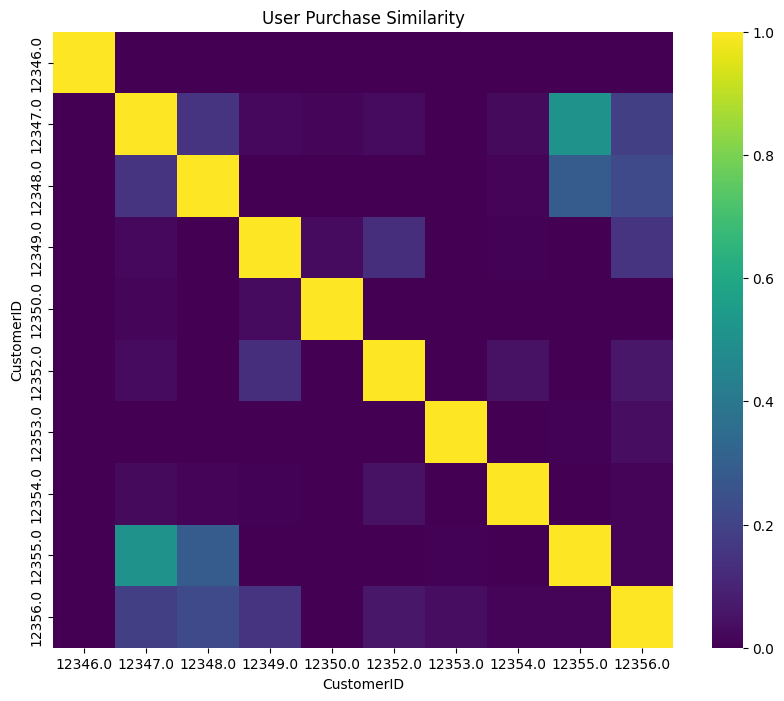

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting heatmap in order to visualise the similarity between users buyin same products-very optional...just for my understanding
plt.figure(figsize=(10,8))
sns.heatmap(similarity_df.iloc[:10, :10], cmap='viridis')
plt.title('User Purchase Similarity')
plt.show()

# **User-Based Collaborative Filtering**

In [29]:
t_user = 12347.0 #select a target user

In [30]:
similar_users = similarity_df.loc[t_user].sort_values(ascending=False).iloc[1:11] #get top similar users
print(similar_users)

CustomerID
14326.0    0.550763
14257.0    0.532240
12674.0    0.529955
12355.0    0.506252
16763.0    0.427662
16761.0    0.427193
13532.0    0.410891
18276.0    0.406837
17242.0    0.384841
12452.0    0.384799
Name: 12347.0, dtype: float64


In [31]:
similar_user_purchases = user_item_matrix.loc[similar_users.index]

In [32]:
mean_product_scores = similar_user_purchases.mean(axis=0)

In [33]:
mean_product_scores

StockCode
10002    0.0
10080    0.0
10120    0.0
10125    0.0
10133    0.0
        ... 
C2       0.0
DOT      0.0
M        0.0
PADS     0.0
POST     1.1
Length: 3665, dtype: float64

In [34]:
targetuser_products = user_item_matrix.loc[t_user] #this only focuses on the target user and the product columns involving target user

In [35]:
targetuser_products

StockCode
10002    0
10080    0
10120    0
10125    0
10133    0
        ..
C2       0
DOT      0
M        0
PADS     0
POST     0
Name: 12347.0, Length: 3665, dtype: int64

In [36]:
items_boughtbytuser = targetuser_products[targetuser_products > 0].index 
#this only shows the items bought from the abover targetuser_products table for target user

In [37]:
items_boughtbytuser

Index([   16008,    17021,    20665,    20719,    20780,    20782,    20966,
          21035,    21041,    21064,
       ...
       '84558A', '84559A', '84559B', '84625A', '84625C', '84997B', '84997C',
       '84997D', '85167B', '85232D'],
      dtype='object', name='StockCode', length=103)

In [38]:
#now finally recommending
recommend_productstotuser = mean_product_scores.drop(items_boughtbytuser)

In [39]:
top_recommendations = recommend_productstotuser.sort_values(ascending=False).head(5)
print("Top recommended products for:", t_user)
print(top_recommendations)

Top recommended products for: 12347.0
StockCode
23077    18.0
22614     7.2
22693     7.2
22418     7.2
20725     6.0
dtype: float64


# **Function to Analyze and Print Recommendation**

In [45]:
product_lookup = rproducts[[ 'Description', 'StockCode' ]].dropna().drop_duplicates()

In [49]:
def recommend_products(user_id, user_product_matrix, similarity_matrix, n=5):
    if user_id not in user_product_matrix.index:     #check whether the given userid exist in the pivot table or not
        print(f"User ID {user_id} not found!")
        return None
        
    similar_users = similarity_matrix.loc[user_id].sort_values(ascending=False).iloc[1:6]   #get similar users as the target user

    similar_users_purchases = user_product_matrix.loc[similar_users.index]                  #get their purchase data
    mean_scoreof_products = similar_users_purchases.mean(axis=0)                            #get average score of the quantities purchased by them

    tuser_purchase = user_product_matrix.loc[user_id]
    items_boughtby_tuser = tuser_purchase[tuser_purchase > 0].index 

    recommend_productsto_tuser = mean_product_scores.drop(items_boughtby_tuser)

    recs_df = recommend_productsto_tuser.sort_values(ascending=False).head(n).reset_index()
    recs_df.columns = [ 'StockCode', 'Score' ]

    merged = pd.merge(recs_df, product_lookup, on='StockCode', how='inner')

    print(f"Top recommendations for user {user_id} are:")
    return merged[[ 'StockCode', 'Description', 'Score' ]]

In [48]:
recommend_products(12347.0, user_item_matrix, similarity_df, n=5)

Top recommendations for user 12347.0 are:


,StockCode,Description,Score
0,23077,DOUGHNUT LIP GLOSS,18.0
1,22614,PACK OF 12 SPACEBOY TISSUES,7.2
2,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,7.2
3,22418,10 COLOUR SPACEBOY PEN,7.2
4,20725,LUNCH BAG RED RETROSPOT,6.0
5,20725,LUNCH BAG RED SPOTTY,6.0
